<a href="https://colab.research.google.com/github/Mukundm98/Water-Potability/blob/main/Water_Quality_potability_of_Drinking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem statement: 
- Design a predictive model with the use of machine learning algorithms to predict whether quality of water good or not.

##Basic Information about dataset


*   ppm: parts per million
*   μg/L: microgram per litre
*   mg/L: milligram per litre




**Column description:**

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0



##Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dadasets available 
!ls "/content/drive/MyDrive/Water quality project/"
filepath = "/content/drive/MyDrive/Water quality project/"

'Attribute info.gdoc'	 'Water_Quality_ph computed with median.gsheet'
 Water_Quality.csv	 'Water_Quality potability of Drinking_.ipynb'
'Water Quality .gsheet'


In [ ]:
#Load CSV
water = pd.read_csv(filepath + 'Water_Quality.csv')

In [ ]:
#To understand the dataset
#To look at the dimensions, number of rows and columns
water.shape

(3276, 10)

In [ ]:
#To look at the names of the columns
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
#To look at the head 10 rows
water.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8905,20791.32,7.300212,368.5164,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.4229,18630.06,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.2363,19909.54,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.3734,22018.42,8.059332,356.8861,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.1015,17978.99,6.546600,310.1357,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.3133,28748.69,7.544869,326.6784,280.467916,8.399735,54.917862,2.559708,0
6,10.223860,248.0717,28749.72,7.513408,393.6634,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.3615,13672.09,4.563009,303.3098,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.9886,14285.58,7.804174,268.6469,389.375566,12.706049,53.928846,3.595017,0
9,11.180280,227.2315,25484.51,9.077200,404.0416,563.885481,17.927806,71.976601,4.370562,0


seems ph and sulfate have missing value from head(10)

In [ ]:
# data information
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


all variable are in float excepy potability which is int value

In [ ]:
#To look at the last 5 records
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.6817,47580.99,7.166639,359.9486,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.5532,17329.80,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.7626,33155.58,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.6038,11983.87,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.1023,17404.18,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


The info command shows that there are **3276** rows. It also indicates the column names and their data type. 
The columns "**ph**" with 2785, "**Sulfate**" with 2495 and 3114 for "**Trihalomethanes**" records indicating the presence of "na" values

In [ ]:
# checking for null values
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# To check the percentage of missing values
water.isna().mean() * 100
#water.isnull().sum() * 100 / len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Missing value percentage


*   pH ~ 15%
*   Sulfate ~ 24%

*   Trihalomethanes ~ 5%







 





In [ ]:
#To find value counts
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
#To convert into categorical variables
water['Potability'] = pd.Categorical(water['Potability'])

In [ ]:
# To recheck using the info function if the categorical variables have been converted
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


coverted data type from int to category type for potability

#EDA

In [ ]:
# columns
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# To describe the dataset
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080794,196.369496,22014.092441,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594319,32.879761,8768.570813,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942600,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850550,15666.687500,6.127421,307.699500,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967650,20927.830000,7.130299,333.073500,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667450,27332.760000,8.114887,359.950200,481.792305,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.200000,13.127000,481.030600,753.342620,28.300000,124.000000,6.739000


variable solid do dispersed value ranging between 320 to 61227 (data is widely scattered)

In [ ]:
# cloning dataframe
water2=water

#Vizualization

In [ ]:
# importing required libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import plotly.express as px
%matplotlib inline

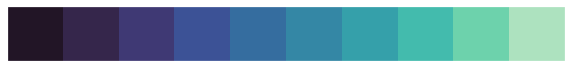

In [ ]:
colors= sns.color_palette("mako", 10)
sns.palplot(colors)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



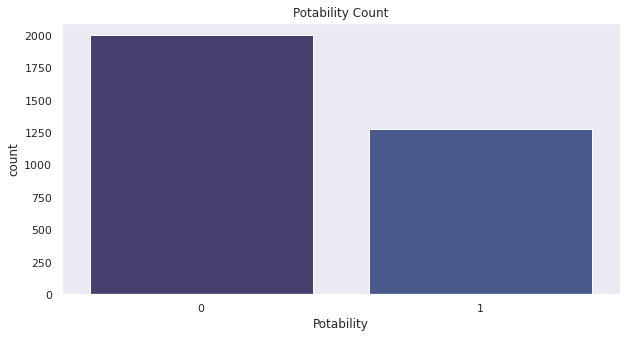

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Potability Count')
sns.set_style('dark')
sns.countplot(water2['Potability'], palette=colors[2:8])

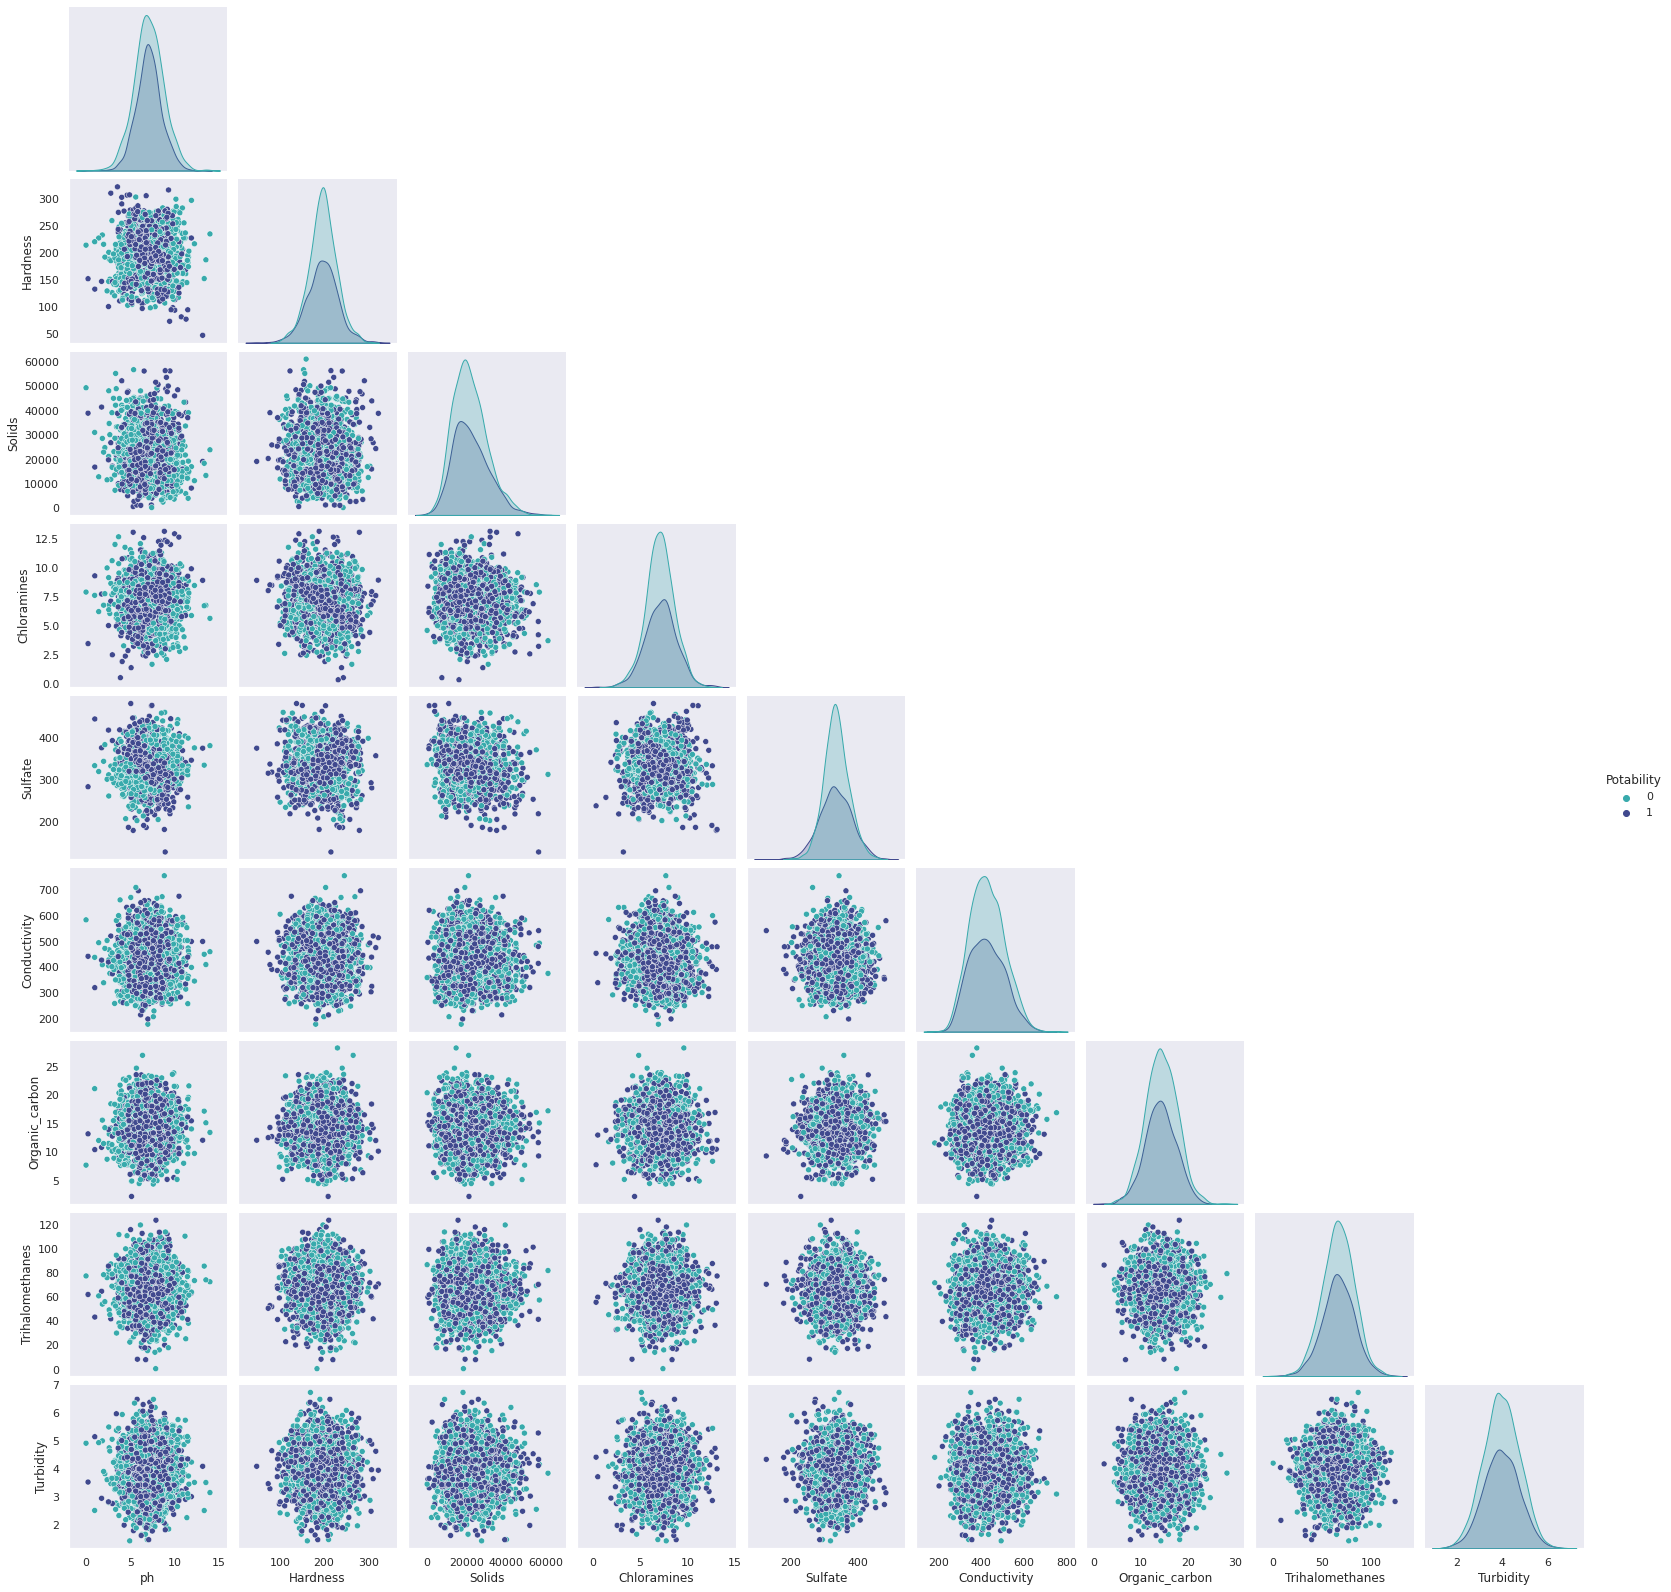

In [ ]:
sns.pairplot(data = water2,hue = 'Potability',palette='mako_r', corner=True)

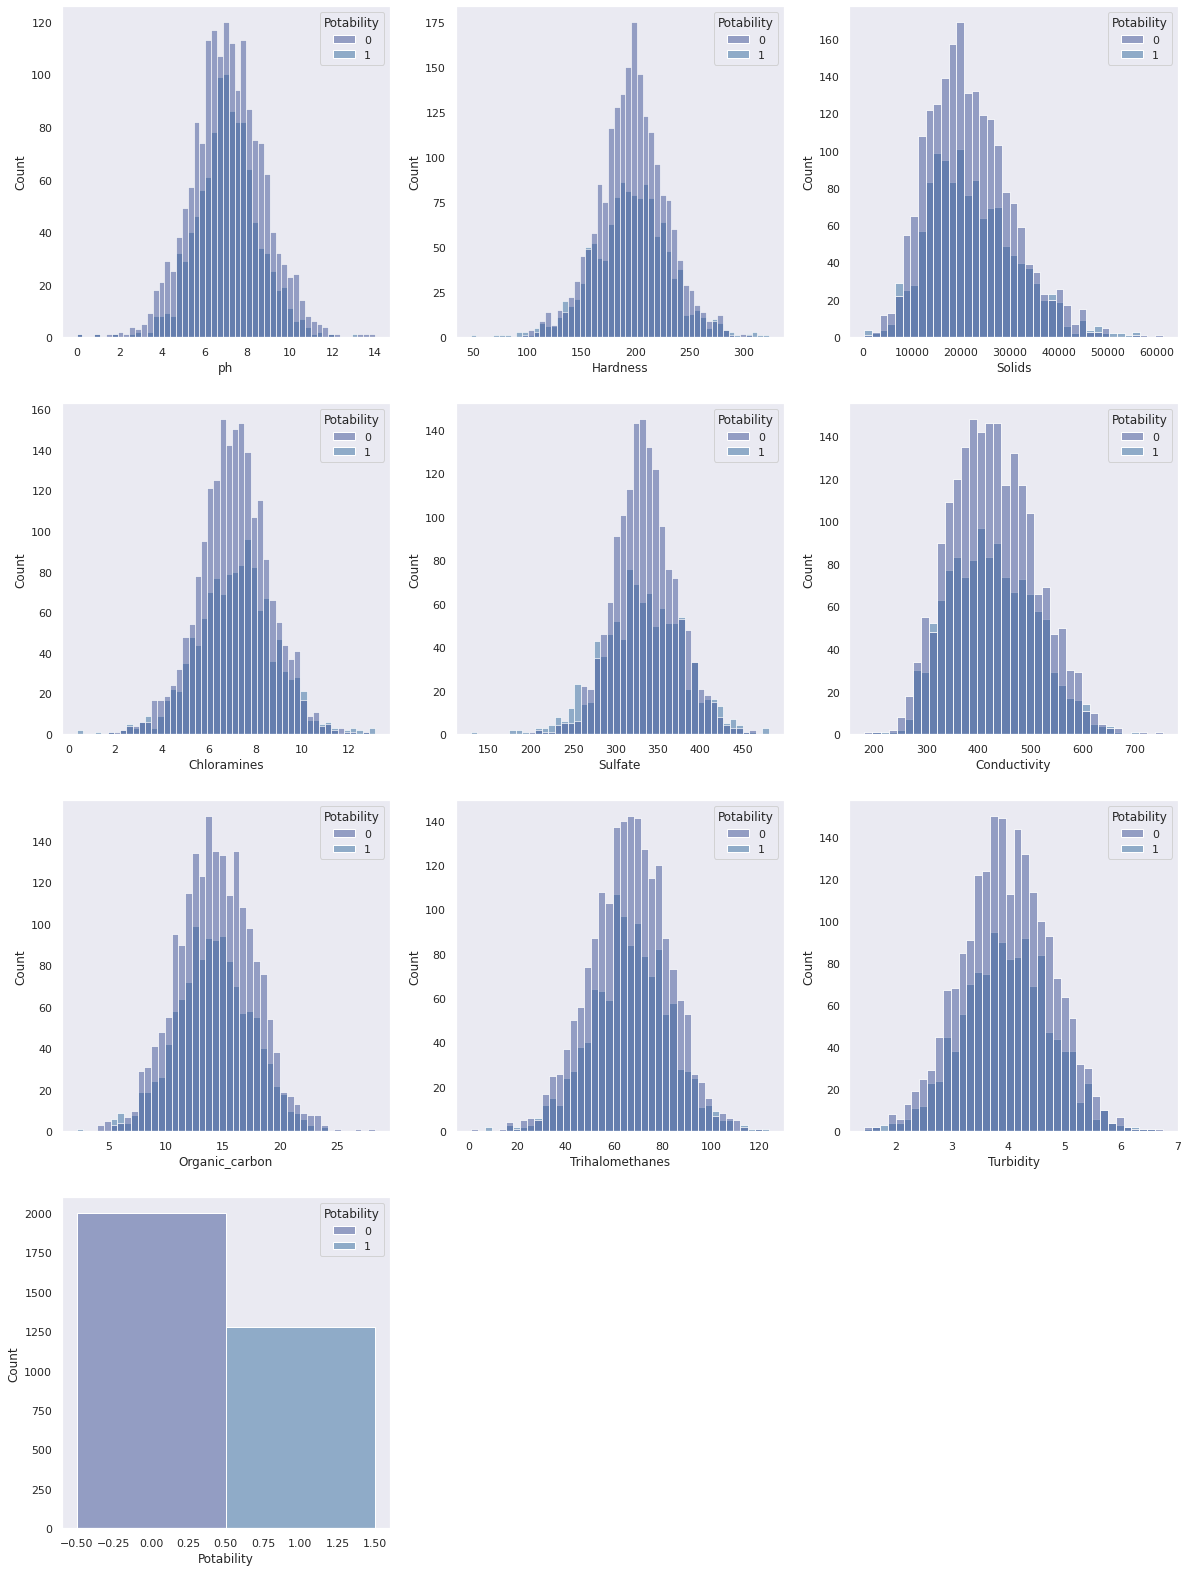

In [ ]:
plt.figure(figsize=(20,28))
sns.set_style('dark')
i = 1
for col in water2.columns:
    plt.subplot(4, 3, i)
    sns.histplot(data = water, x = water2[col], hue ='Potability', palette=colors[3:5])
    i+=1

#Treating Missing Value

There are minor outliers present in the dataset, so it to better to impute missing values using  median 

In [ ]:
# water2['Sulfate'].fillna(water2['Sulfate'].median(), inplace=True)
# water2['Trihalomethanes'].fillna(water2['Trihalomethanes'].median(), inplace=True)
# water2['ph'].fillna(water2['ph'].median(), inplace=True)

In [ ]:
water2['Sulfate'].fillna(water2['Sulfate'].mean(), inplace=True)
water2['Trihalomethanes'].fillna(water2['Trihalomethanes'].mean(), inplace=True)
water2['ph'].fillna(water2['ph'].mean(), inplace=True)

In [ ]:
water2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

We have successfully treated missing values now we will treat outliers

#Treating outliers

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Hardness"
print(water2['Hardness'].quantile(0.05)) 
print(water2['Hardness'].quantile(0.95)) 

141.76325
249.6098


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 249.6098
water2['Hardness'] = np.where(water2['Hardness'] > 249.6098, 249.6098, water2['Hardness'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 180
water2['Hardness'] = np.where(water2['Hardness'] < 141.76, 141.76, water2['Hardness'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Solids"
print(water2['Solids'].quantile(0.05)) 
print(water2['Solids'].quantile(0.95)) 

9545.8125
38474.9875


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 38474.98
water2['Solids'] = np.where(water2['Solids'] > 38474.98, 38474.98, water2['Solids'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 9545.81
water2['Solids'] = np.where(water2['Solids'] < 9545.81, 9545.81, water2['Solids'])


In [ ]:
# To calculate the 5th and 95th quantile value of the column "Chloramines"
print(water2['Chloramines'].quantile(0.05)) 
print(water2['Chloramines'].quantile(0.95)) 

4.5030537105
9.753100545999999


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 9.75
water2['Chloramines'] = np.where(water2['Chloramines'] > 9.75, 9.75, water2['Chloramines'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 4.50
water2['Chloramines'] = np.where(water2['Chloramines'] < 4.50, 4.50, water2['Chloramines'])


In [ ]:
# To calculate the 5th and 95th quantile value of the column "Sulfate"
print(water2['Sulfate'].quantile(0.05)) 
print(water2['Sulfate'].quantile(0.95)) 

274.607925
395.554125


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 395.55
water2['Sulfate'] = np.where(water2['Sulfate'] > 395.55, 395.55, water2['Sulfate'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 274.60
water2['Sulfate'] = np.where(water2['Sulfate'] < 274.60, 274.60, water2['Sulfate'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Conductivity"
print(water2['Conductivity'].quantile(0.05)) 
print(water2['Conductivity'].quantile(0.95)) 

300.1094657
566.34931985


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 566.34
water2['Conductivity'] = np.where(water2['Conductivity'] > 566.34, 566.34, water2['Conductivity'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 300.11
water2['Conductivity'] = np.where(water2['Conductivity'] < 300.11, 300.11, water2['Conductivity'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Organic_carbon"
print(water2['Organic_carbon'].quantile(0.05)) 
print(water2['Organic_carbon'].quantile(0.95)) 

8.81536170225
19.637254445


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 19.64
water2['Organic_carbon'] = np.where(water2['Organic_carbon'] > 19.64, 19.64, water2['Organic_carbon'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 8.81
water2['Organic_carbon'] = np.where(water2['Organic_carbon'] < 8.81, 8.81, water2['Organic_carbon'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Trihalomethanes"
print(water2['Trihalomethanes'].quantile(0.05)) 
print(water2['Trihalomethanes'].quantile(0.95))

39.9062353875
91.7445945325


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 91.74
water2['Trihalomethanes'] = np.where(water2['Trihalomethanes'] > 91.74, 91.74, water2['Trihalomethanes'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 39.91
water2['Trihalomethanes'] = np.where(water2['Trihalomethanes'] < 39.91, 39.91, water2['Trihalomethanes'])

In [ ]:
# To calculate the 5th and 95th quantile value of the column "Turbidity"
print(water2['Turbidity'].quantile(0.05)) 
print(water2['Turbidity'].quantile(0.95)) 

2.684279234
5.22092452525


In [ ]:
# To replace any value greater than 95th quantile value with the 95th quantile value which is 5.2
water2['Turbidity'] = np.where(water2['Turbidity'] > 5.2, 5.2, water2['Turbidity'])
# To replace any value lesser than 5th quantile value with the 5th quantile value which is 2.68
water2['Turbidity'] = np.where(water2['Turbidity'] < 2.68, 2.68, water2['Turbidity'])

TypeError: ignored

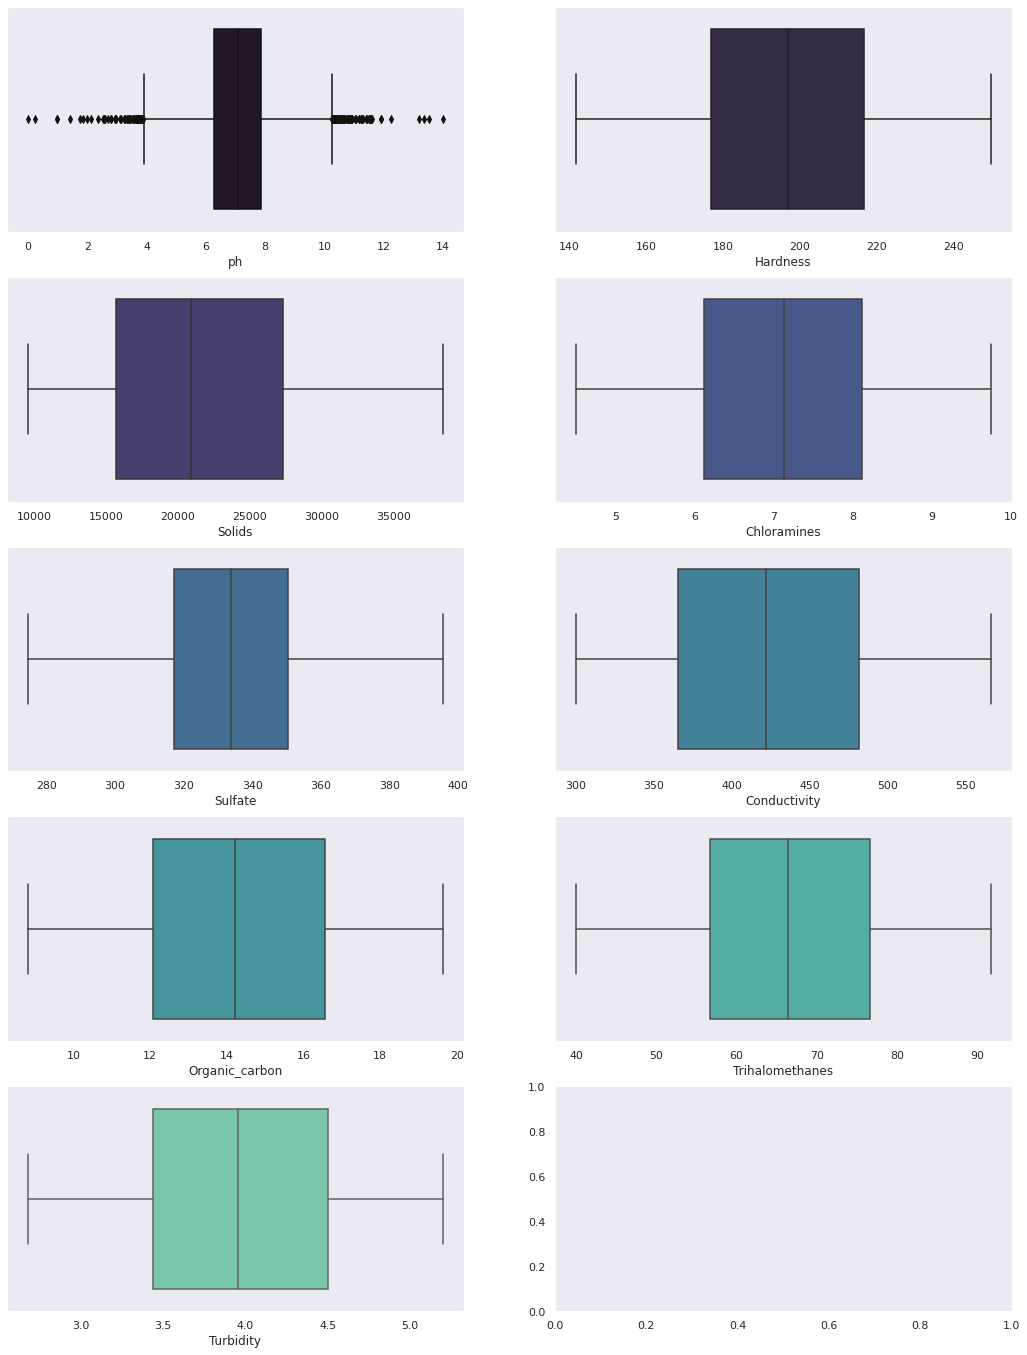

In [ ]:
plt.figure(figsize=(18,24))
sns.set_style('dark')
i = 1
for col in water2.columns:
    plt.subplot(5, 2, i)
    sns.boxplot(x=water2[col], palette=colors[i-1:i])
    i+=1

In [ ]:
#Visualizing the Correlation Matrix of Features
plt.figure(figsize=(10,8))
sns.heatmap(water2.corr(),annot=True,fmt='.2f')
plt.show()

#Scaling (Min-max)

In [ ]:
# Import packages
from sklearn import preprocessing
# To scale the data 
min_max_scaler = preprocessing.MinMaxScaler()
water2[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity","Organic_carbon", "Trihalomethanes", "Turbidity", "Potability" ]] = min_max_scaler.fit_transform(water2[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity","Organic_carbon", "Trihalomethanes", "Turbidity", "Potability"]])

In [ ]:
water2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505771,0.505997,0.427152,0.500264,0.490271,0.471228,0.504915,0.511211,0.509970,0.390110
std,0.104997,0.268646,0.275986,0.268930,0.253436,0.282988,0.277865,0.271817,0.281565,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.325365,0.211582,0.309985,0.351340,0.246495,0.300628,0.322934,0.301473,0.000000
50%,0.505771,0.511894,0.393444,0.501009,0.489258,0.457405,0.499385,0.511022,0.505963,0.000000
75%,0.562146,0.694553,0.614845,0.688550,0.626588,0.682426,0.715388,0.709176,0.722349,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=water2.drop('Potability',axis=1)

y=water2['Potability']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scale= StandardScaler()
 
# # standardization 
# scaled = scale.fit_transform(X) 
# print(scaled)

In [ ]:
# scaled.head()

In [ ]:
y.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

#Splitting of Train and Test Data

In [ ]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2620, 9) (656, 9) (2620,) (656,)


2620 examples were allocated to the training set and 656 examples were allocated to the test set, as we specified.

In [ ]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,0.473115,0.568106,0.263453,0.295162,0.306956,0.413677,0.656002,0.484492,0.093320
831,0.477479,0.482902,0.850746,1.000000,0.578217,0.743545,0.000809,0.516098,0.535976
2658,0.488290,0.592562,0.303345,0.421496,0.192122,0.730099,0.461581,0.594332,0.901789
2495,0.505771,0.386916,0.108200,1.000000,0.374292,0.684878,0.415487,0.133965,0.222389
2603,0.457628,0.381318,0.287089,0.564335,0.478600,0.370618,0.784083,0.466144,0.751575


In [ ]:
X_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [ ]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,0.505771,0.387215,0.377316,0.539659,0.483832,0.211317,1.000000,0.523054,0.875648
2782,0.474511,0.437215,0.806384,0.436478,0.489862,0.136917,0.544488,0.538971,0.746904
1644,0.560433,0.763088,0.474203,0.270927,0.213333,0.330020,0.424445,0.061069,0.000000
70,0.511462,0.383212,0.000000,0.000000,0.024796,0.480511,0.091378,0.967111,0.478131
2045,0.472525,0.347527,0.582355,0.916030,0.489258,0.737158,0.367183,0.739965,0.703747


In [ ]:
y_train.head()

233     0.0
831     0.0
2658    0.0
2495    0.0
2603    0.0
Name: Potability, dtype: float64

In [ ]:
y_test.head()

2947    0.0
2782    1.0
1644    0.0
70      0.0
2045    1.0
Name: Potability, dtype: float64

## Balancing the data

In [ ]:

# #check version number
# import imblearn
# print(imblearn.__version__)

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 42)
# X_train, y_train = sm.fit_resample(X_train, y_train)
# # X_test,y_test = sm.fit_resample(X_test,y_test)

In [ ]:
# y_train.value_counts()

In [ ]:
# y_test.value_counts()

#Modelling


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



## Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 62.8
F1 score: 0.0


## K Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 60.21
F1 score: 42.64


## Decision Tree Classifier

In [ ]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dec_tree = dec_tree.predict(X_test)

In [ ]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 58.38
F1 score: 45.94


In [ ]:
from sklearn.tree import plot_tree, export_text

KeyError: ignored

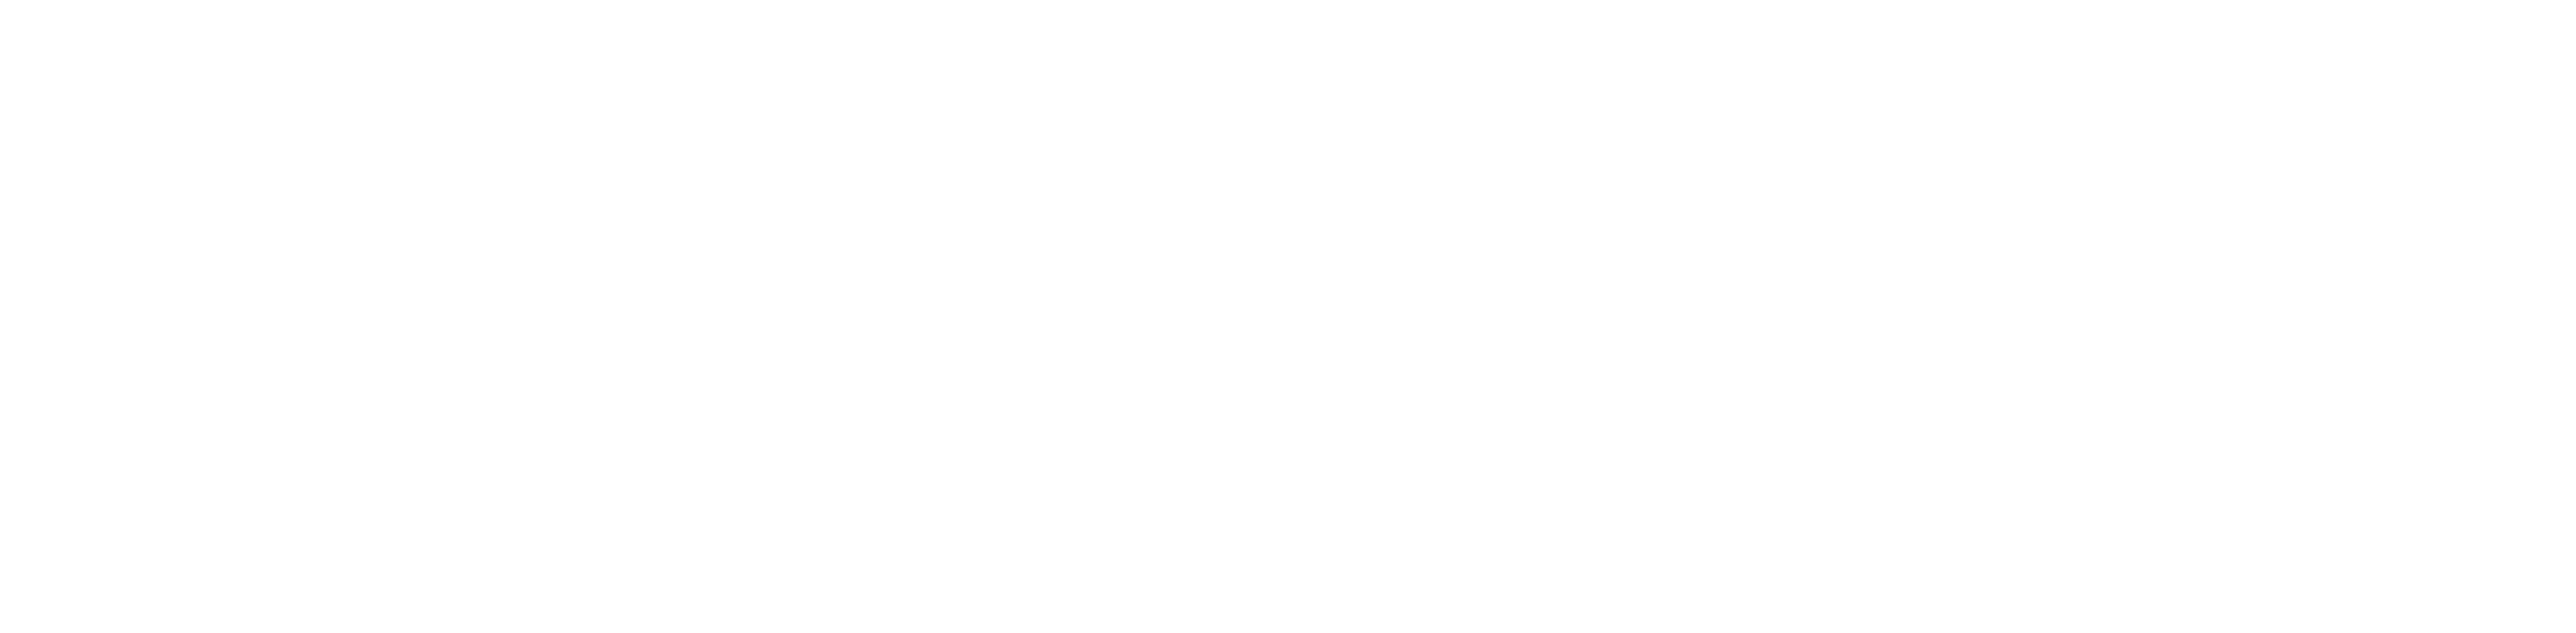

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(dec_tree, feature_names=X_train, max_depth=2, filled=True);